# **EDA**
---


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from tabulate import tabulate
from scipy.spatial.distance import cdist
import pickle
from flask import Flask, request, jsonify

In [ ]:
df = pd.read_csv("economic_indonesia.csv")

In [ ]:
df.head()

,province,cities_reg,poorpeople_percentage,reg_gdp,life_exp,avg_schooltime,exp_percap
0,Aceh,Simeulue,18.98,2.275,65.240,9.48,7148
1,Aceh,Aceh Singkil,20.36,2.425,67.355,8.68,8776
2,Aceh,Aceh Selatan,13.18,5.531,64.360,8.88,8180
3,Aceh,Aceh Tenggara,13.41,5.063,68.155,9.67,8030
4,Aceh,Aceh Timur,14.45,10.616,68.705,8.21,8577


In [ ]:
df.shape

(514, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   province               514 non-null    object 
 1   cities_reg             514 non-null    object 
 2   poorpeople_percentage  514 non-null    float64
 3   reg_gdp                514 non-null    float64
 4   life_exp               514 non-null    float64
 5   avg_schooltime         514 non-null    float64
 6   exp_percap             514 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 28.2+ KB


In [ ]:
df.rename(columns={'province': 'provinsi', 'cities_reg': 'kab_kota', 'poorpeople_percentage': 'persentase_orang_miskin',
                   'reg_gdp': 'pendapatan_daerah', 'life_exp': 'angka_harapan_hidup', 'avg_schooltime': 'rata_lama_sekolah',
                   'exp_percap': 'pengeluaran_perkapita' }, inplace=True)

In [ ]:
df['persentase_orang_miskin'] = df['persentase_orang_miskin'].astype(int)
df['pendapatan_daerah'] = df['pendapatan_daerah'].astype(int)
df['angka_harapan_hidup'] = df['angka_harapan_hidup'].astype(int)
df['rata_lama_sekolah'] = df['rata_lama_sekolah'].astype(int)

In [ ]:
df.describe()

,persentase_orang_miskin,pendapatan_daerah,angka_harapan_hidup,rata_lama_sekolah,pengeluaran_perkapita
count,514.000000,514.000000,514.000000,514.000000,514.000000
mean,11.774319,34.307393,69.151751,7.945525,10324.787938
std,7.460072,84.170687,3.441566,1.627298,2717.144186
min,2.000000,1.000000,55.000000,1.000000,3976.000000
25%,7.000000,5.000000,67.000000,7.000000,8574.000000
50%,10.000000,13.000000,69.000000,8.000000,10196.500000
75%,14.000000,28.000000,71.750000,9.000000,11719.000000
max,41.000000,819.000000,77.000000,12.000000,23888.000000


In [ ]:
df.isnull().sum()

provinsi                   0
kab_kota                   0
persentase_orang_miskin    0
pendapatan_daerah          0
angka_harapan_hidup        0
rata_lama_sekolah          0
pengeluaran_perkapita      0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)
duplicatedValues = df.duplicated()
duplicatedValues.sum()

0

<ipython-input-11-fcba069d8df0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

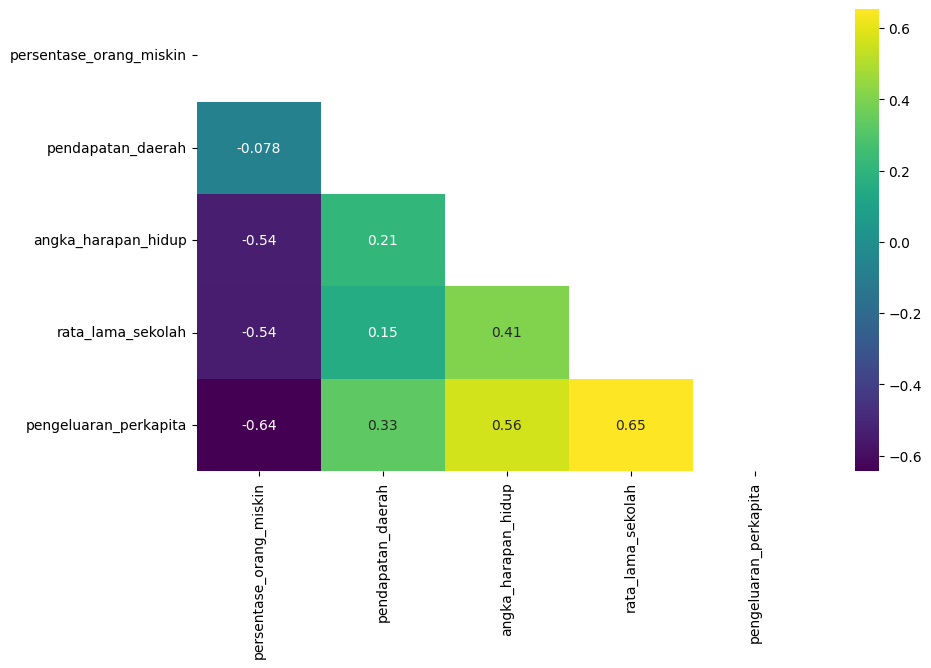

In [ ]:
corr = df.corr()
f, ax = plt.subplots(figsize=(10,6))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask = mask, cmap='viridis')

<Axes: xlabel='rata_lama_sekolah', ylabel='pengeluaran_perkapita'>

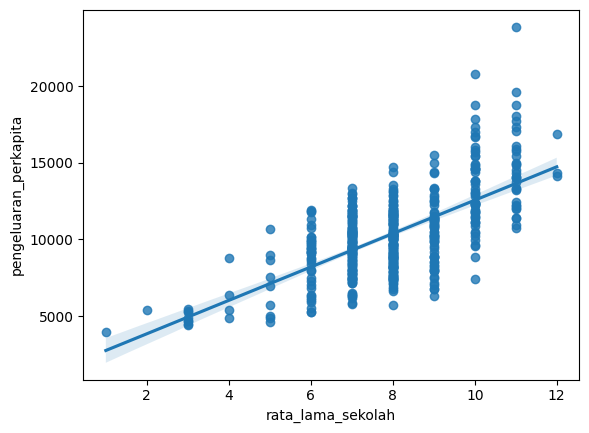

In [ ]:
# Nilai Korelasi : 0.65
sns.regplot(x='rata_lama_sekolah',y='pengeluaran_perkapita',data=df)

<Axes: xlabel='angka_harapan_hidup', ylabel='pengeluaran_perkapita'>

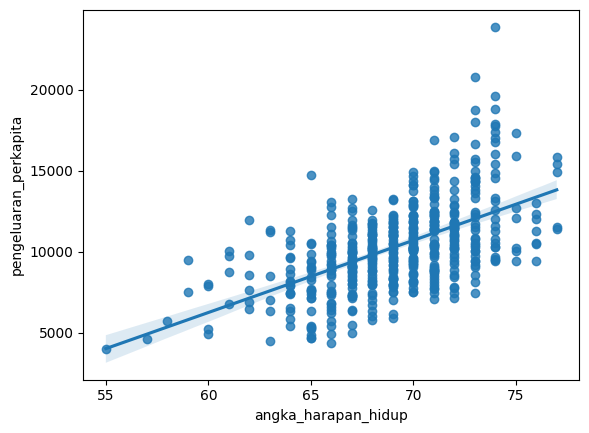

In [ ]:
# Nilai Korelasi : 0.56
sns.regplot(x='angka_harapan_hidup',y='pengeluaran_perkapita',data=df)

<Axes: xlabel='angka_harapan_hidup', ylabel='rata_lama_sekolah'>

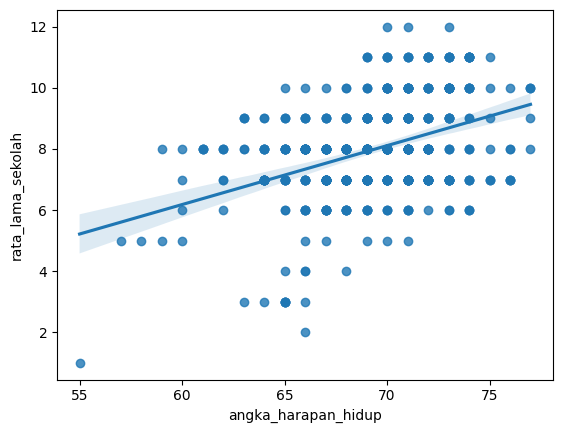

In [ ]:
# Nilai Korelasi : 0.41
sns.regplot(x='angka_harapan_hidup',y='rata_lama_sekolah',data=df)

<Axes: xlabel='pendapatan_daerah', ylabel='pengeluaran_perkapita'>

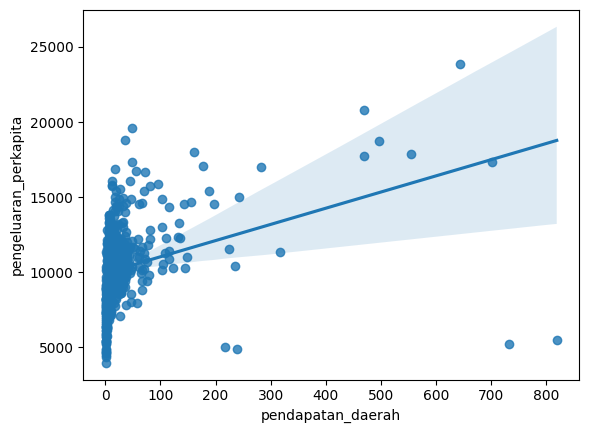

In [ ]:
# Nilai Korelasi : 0.33
sns.regplot(x='pendapatan_daerah',y='pengeluaran_perkapita',data=df)

<Axes: xlabel='pendapatan_daerah', ylabel='angka_harapan_hidup'>

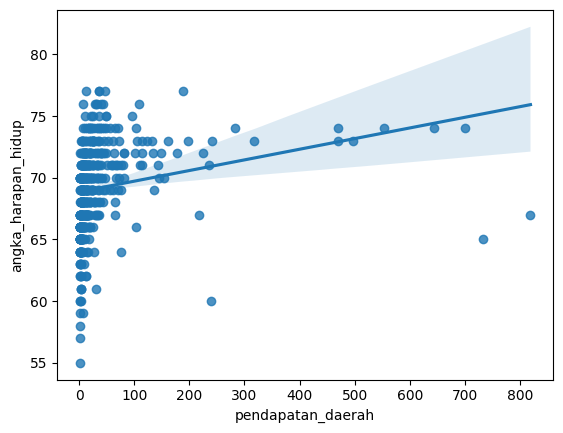

In [ ]:
# Nilai Korelasi : 0.21
sns.regplot(x='pendapatan_daerah',y='angka_harapan_hidup',data=df)

<Axes: xlabel='pendapatan_daerah', ylabel='rata_lama_sekolah'>

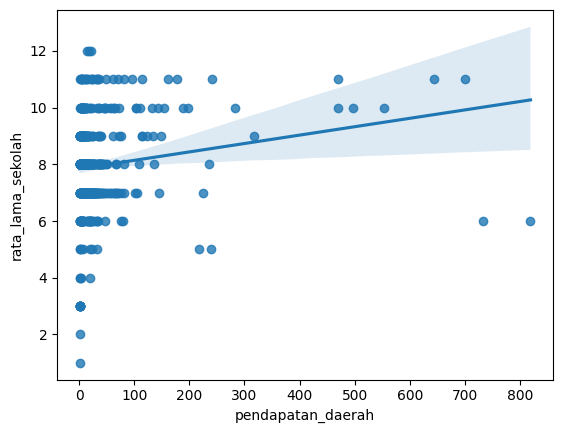

In [ ]:
# Nilai Korelasi : 0.15
sns.regplot(x='pendapatan_daerah',y='rata_lama_sekolah',data=df)

In [ ]:
df

,provinsi,kab_kota,persentase_orang_miskin,pendapatan_daerah,angka_harapan_hidup,rata_lama_sekolah,pengeluaran_perkapita
0,Aceh,Simeulue,18,2,65,9,7148
1,Aceh,Aceh Singkil,20,2,67,8,8776
2,Aceh,Aceh Selatan,13,5,64,8,8180
3,Aceh,Aceh Tenggara,13,5,68,9,8030
4,Aceh,Aceh Timur,14,10,68,8,8577
...,...,...,...,...,...,...,...
509,Papua,Puncak,36,1,66,2,5412
510,Papua,Dogiyai,28,1,65,4,5415
511,Papua,Intan Jaya,41,1,65,3,5328
512,Papua,Deiyai,40,1,65,3,4673


#**PRE-PROCESSING**
---



In [ ]:
df = df.drop('persentase_orang_miskin', axis=1);

In [ ]:
df.head()

,provinsi,kab_kota,pendapatan_daerah,angka_harapan_hidup,rata_lama_sekolah,pengeluaran_perkapita
0,Aceh,Simeulue,2,65,9,7148
1,Aceh,Aceh Singkil,2,67,8,8776
2,Aceh,Aceh Selatan,5,64,8,8180
3,Aceh,Aceh Tenggara,5,68,9,8030
4,Aceh,Aceh Timur,10,68,8,8577


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 514 entries, 0 to 513
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   provinsi               514 non-null    object
 1   kab_kota               514 non-null    object
 2   pendapatan_daerah      514 non-null    int64 
 3   angka_harapan_hidup    514 non-null    int64 
 4   rata_lama_sekolah      514 non-null    int64 
 5   pengeluaran_perkapita  514 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 28.1+ KB


# **MODELLING**
---



In [ ]:
# Kolom yang relevant untuk di cluster
X = df[['pendapatan_daerah','angka_harapan_hidup','rata_lama_sekolah','pengeluaran_perkapita']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.3842058 , -1.20753057,  0.64862241, -1.17030327],
       [-0.3842058 , -0.62583355,  0.03350817, -0.57056109],
       [-0.34852922, -1.49837907,  0.03350817, -0.79012272],
       ...,
       [-0.396098  , -1.20753057, -3.04206303, -1.84077671],
       [-0.396098  , -1.20753057, -3.04206303, -2.08207347],
       [-0.02743997,  0.24671196,  1.87885089,  1.69910203]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

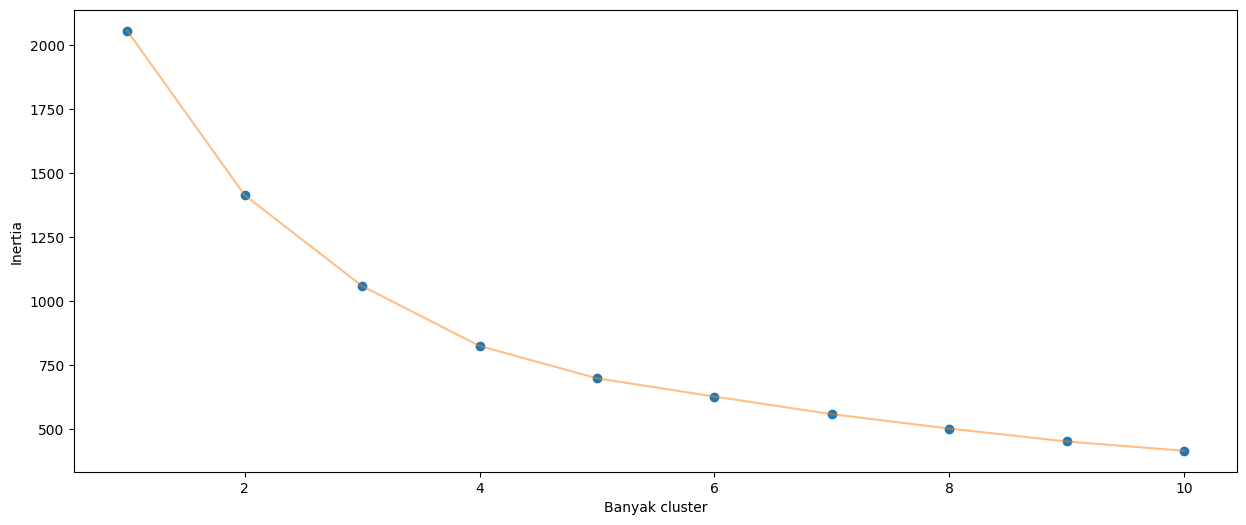

In [ ]:
# Menentukan banyak cluster menggunakan elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(1,figsize=(15,6))
plt.plot(range(1, 11), sse, 'o')
plt.plot(range(1, 11), sse, '-', alpha=0.5)
plt.xlabel("Banyak cluster")
plt.ylabel("Inertia")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

# Menambahkan column cluster
df['Cluster'] = clusters

# Menganalisa rata2 atribut tiap cluster
cluster_analysis = df.groupby('Cluster').agg({
    'pendapatan_daerah': 'mean',
    'angka_harapan_hidup': 'mean',
    'rata_lama_sekolah': 'mean',
    'pengeluaran_perkapita': 'mean'}).round(0)

print(cluster_analysis)

         pendapatan_daerah  angka_harapan_hidup  rata_lama_sekolah  \
Cluster                                                              
0                     20.0                 68.0                7.0   
1                     64.0                 72.0                9.0   

         pengeluaran_perkapita  
Cluster                         
0                       9072.0  
1                      12975.0  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Assuming you have a DataFrame named df
description_table = cluster_analysis

# Convert the table to Markdown format
markdown_table = tabulate(description_table, headers='keys', tablefmt='pipe')

# Print the Markdown table
print(markdown_table)

|   Cluster |   pendapatan_daerah |   angka_harapan_hidup |   rata_lama_sekolah |   pengeluaran_perkapita |
|----------:|--------------------:|----------------------:|--------------------:|------------------------:|
|         0 |                  20 |                    68 |                   7 |                    9072 |
|         1 |                  64 |                    72 |                   9 |                   12975 |


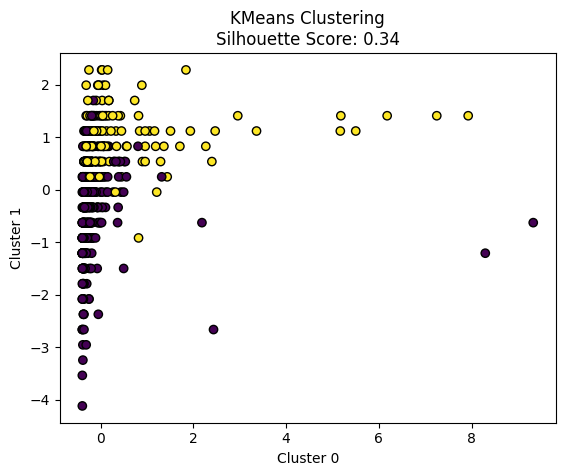

In [ ]:
silhouette_avg = silhouette_score(X_scaled, clusters)

plt.scatter(x=X_scaled[:, 0], y=X_scaled[:, 1], c=clusters, cmap='viridis', edgecolors='k')
plt.title(f'KMeans Clustering\nSilhouette Score: {silhouette_avg:.2f}')
plt.xlabel('Cluster 0')
plt.ylabel('Cluster 1')
plt.show()

In [ ]:
presentasi_penduduk_miskin = df[(df['Cluster']== 0)]
presentasi_penduduk_miskin

,provinsi,kab_kota,pendapatan_daerah,angka_harapan_hidup,rata_lama_sekolah,pengeluaran_perkapita,Cluster
0,Aceh,Simeulue,2,65,9,7148,0
1,Aceh,Aceh Singkil,2,67,8,8776,0
2,Aceh,Aceh Selatan,5,64,8,8180,0
3,Aceh,Aceh Tenggara,5,68,9,8030,0
4,Aceh,Aceh Timur,10,68,8,8577,0
...,...,...,...,...,...,...,...
508,Papua,Yalimo,1,65,3,4664,0
509,Papua,Puncak,1,66,2,5412,0
510,Papua,Dogiyai,1,65,4,5415,0
511,Papua,Intan Jaya,1,65,3,5328,0


In [ ]:
presentasi_penduduk_miskin = df[(df['Cluster']== 1)]
presentasi_penduduk_miskin

,provinsi,kab_kota,pendapatan_daerah,angka_harapan_hidup,rata_lama_sekolah,pengeluaran_perkapita,Cluster
7,Aceh,Aceh Besar,13,69,10,9644,1
16,Aceh,Bener Meriah,4,69,10,11118,1
18,Aceh,Kota Banda Aceh,18,71,12,16891,1
19,Aceh,Kota Sabang,1,70,11,11378,1
20,Aceh,Kota Langsa,5,69,11,12067,1
...,...,...,...,...,...,...,...
460,Maluku,Kota Ambon,14,70,12,14148,1
470,Maluku Utara,Kota Ternate,10,71,11,13290,1
484,Papua Barat,Kota Sorong,15,70,11,13744,1
493,Papua,Mimika,63,72,10,11400,1


In [ ]:
df

,provinsi,kab_kota,pendapatan_daerah,angka_harapan_hidup,rata_lama_sekolah,pengeluaran_perkapita,Cluster
0,Aceh,Simeulue,2,65,9,7148,0
1,Aceh,Aceh Singkil,2,67,8,8776,0
2,Aceh,Aceh Selatan,5,64,8,8180,0
3,Aceh,Aceh Tenggara,5,68,9,8030,0
4,Aceh,Aceh Timur,10,68,8,8577,0
...,...,...,...,...,...,...,...
509,Papua,Puncak,1,66,2,5412,0
510,Papua,Dogiyai,1,65,4,5415,0
511,Papua,Intan Jaya,1,65,3,5328,0
512,Papua,Deiyai,1,65,3,4673,0


# **Testing**
pendapatan daerah :

angka harapan hidup :

rata lama sekolah :

pengeluaran perkapita :

In [ ]:
data = [(1, 3, 1, 5)]
print(kmeans.predict(data))

[1]


In [ ]:
data = [(1, 0, 0, 0)]
print(kmeans.predict(data))

[0]


In [ ]:
filename = 'economic_indonesia.pkl'
pickle.dump(kmeans, open(filename, 'wb'))

---
Cluster = 0

---


adalah Kelompok Daerah yang memiliki  

* pendapatan daerah : 20
* angka harapan hidup : 68
* rata lama sekolah : 7
* pengeluaran perkapita : 9072

artinya daerah tersebut Layak Untuk Dibantu


---
Cluster = 1

---


adalah Kelompok Daerah yang memiliki  

* pendapatan daerah : 64
* angka harapan hidup : 72
* rata lama sekolah : 9
* pengeluaran perkapita : 12975

artinya daerah tersebut Tidak Perlu Untuk Dibantu

---

